<a href="https://colab.research.google.com/github/Vincent-Kwan/Safe-Roads-Competition/blob/master/Alcohol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Alcohol_Related.csv')

In [3]:
df.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.850989e+06,5.406999e+06,5375829,1045558,2008,2008/06/30 04:00:00+00,120,1,F G GARDINER XY W,ISLINGTON AVE,<Null>,<Null>,Etobicoke York,3,22,43.621145,-79.50979,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Non-Fatal Injury,SMV Other,Passenger,20 to 24,Minor,<Null>,<Null>,Other,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,Yes,<Null>,D22,16,Stonegate-Queensway (16),1
1,-8.850989e+06,5.406999e+06,5375830,1045558,2008,2008/06/30 04:00:00+00,120,1,F G GARDINER XY W,ISLINGTON AVE,<Null>,<Null>,Etobicoke York,3,22,43.621145,-79.50979,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Non-Fatal Injury,SMV Other,Passenger,25 to 29,Minor,<Null>,<Null>,Other,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,Yes,<Null>,D22,16,Stonegate-Queensway (16),2
2,-8.850989e+06,5.406999e+06,5375831,1045558,2008,2008/06/30 04:00:00+00,120,1,F G GARDINER XY W,ISLINGTON AVE,<Null>,<Null>,Etobicoke York,3,22,43.621145,-79.50979,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Non-Fatal Injury,SMV Other,Passenger,25 to 29,Major,<Null>,<Null>,Other,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,Yes,<Null>,D22,16,Stonegate-Queensway (16),3
3,-8.850989e+06,5.406999e+06,5375832,1045558,2008,2008/06/30 04:00:00+00,120,1,F G GARDINER XY W,ISLINGTON AVE,<Null>,<Null>,Etobicoke York,3,22,43.621145,-79.50979,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Non-Fatal Injury,SMV Other,Passenger,25 to 29,Major,<Null>,<Null>,Other,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,Yes,<Null>,D22,16,Stonegate-Queensway (16),4
4,-8.850989e+06,5.406999e+06,5375833,1045558,2008,2008/06/30 04:00:00+00,120,1,F G GARDINER XY W,ISLINGTON AVE,<Null>,<Null>,Etobicoke York,3,22,43.621145,-79.50979,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Non-Fatal Injury,SMV Other,Driver,30 to 34,Major,<Null>,West,"Automobile, Station Wagon",Going Ahead,Lost control,"Ability Impaired, Alcohol",<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,Yes,<Null>,D22,16,Stonegate-Queensway (16),5


In [5]:
df.shape

(739, 57)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                739 non-null    float64
 1   Y                739 non-null    float64
 2   INDEX_           739 non-null    int64  
 3   ACCNUM           739 non-null    int64  
 4   YEAR             739 non-null    int64  
 5   DATE             739 non-null    object 
 6   TIME             739 non-null    int64  
 7   HOUR             739 non-null    int64  
 8   STREET1          739 non-null    object 
 9   STREET2          739 non-null    object 
 10  OFFSET           739 non-null    object 
 11  ROAD_CLASS       739 non-null    object 
 12  DISTRICT         739 non-null    object 
 13  WARDNUM          739 non-null    object 
 14  DIVISION         739 non-null    object 
 15  LATITUDE         739 non-null    float64
 16  LONGITUDE        739 non-null    float64
 17  LOCCOORD        

Drivers in (DRIVCOND ==Ability Impaired, Alcohol Over .08 & Ability Impaired) are the drivers under influence or the drivers at fault.

In [8]:
df.ACCNUM.nunique()

231

231 accidents from 2006 to 2020.

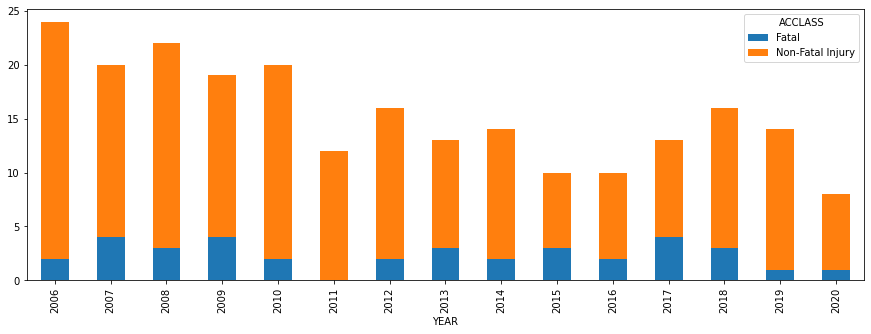

In [10]:
df.groupby(['YEAR','ACCLASS'])['ACCNUM'].nunique().unstack().plot(kind='bar', stacked=True,figsize=(15, 5))

In [11]:
injury_over_years = df.groupby(['YEAR','ACCLASS'])['ACCNUM'].nunique()
injury_over_years.groupby(level=[0]).apply(lambda g: 100* g / g.sum()).round(2)

YEAR  ACCLASS         
2006  Fatal                 8.33
      Non-Fatal Injury     91.67
2007  Fatal                20.00
      Non-Fatal Injury     80.00
2008  Fatal                13.64
      Non-Fatal Injury     86.36
2009  Fatal                21.05
      Non-Fatal Injury     78.95
2010  Fatal                10.00
      Non-Fatal Injury     90.00
2011  Non-Fatal Injury    100.00
2012  Fatal                12.50
      Non-Fatal Injury     87.50
2013  Fatal                23.08
      Non-Fatal Injury     76.92
2014  Fatal                14.29
      Non-Fatal Injury     85.71
2015  Fatal                30.00
      Non-Fatal Injury     70.00
2016  Fatal                20.00
      Non-Fatal Injury     80.00
2017  Fatal                30.77
      Non-Fatal Injury     69.23
2018  Fatal                18.75
      Non-Fatal Injury     81.25
2019  Fatal                 7.14
      Non-Fatal Injury     92.86
2020  Fatal                12.50
      Non-Fatal Injury     87.50
Name: ACCNUM, dtype:

While the total number of accidents decreased in 2020, overall fatal accidents increased from 7% to 12.5%.

In [9]:
#Plot fatality rate

In [14]:
#Number of deaths
df[df['INJURY'] == 'Fatal'].groupby(['YEAR'])['ACCNUM'].count()

YEAR
2006    2
2007    5
2008    3
2009    6
2010    2
2012    2
2013    3
2014    2
2015    3
2016    2
2017    4
2018    3
2019    2
2020    1
Name: ACCNUM, dtype: int64

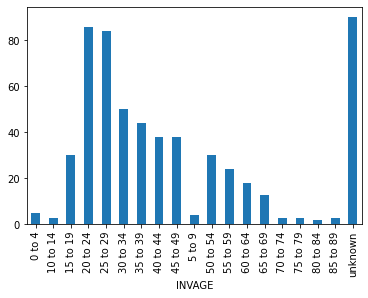

In [15]:
#Age group of all people involved
df.groupby('INVAGE')['ACCNUM'].nunique().plot(kind='bar')

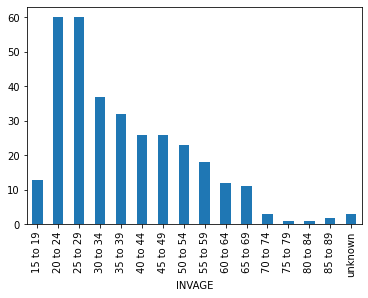

In [17]:
#Age group of drivers
df[df['INVTYPE'] == 'Driver'].groupby('INVAGE')['ACCNUM'].nunique().plot(kind='bar')

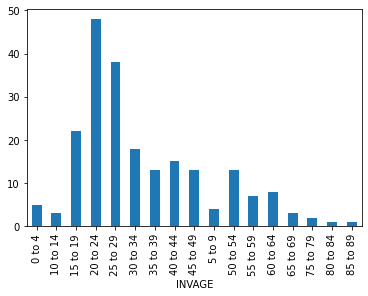

In [17]:
df[(df['INVTYPE'] != 'Driver') & (df['INVAGE'] != 'unknown')].groupby('INVAGE')['ACCNUM'].nunique().plot(kind='bar')

In [115]:
#Age group of drivers under influence
Drivers = df[(df['DRIVCOND'] == 'Ability Impaired, Alcohol Over .08') | (df['DRIVCOND'] == 'Ability Impaired, Alcohol')].groupby('INVAGE')['ACCNUM'].count().reset_index()
Drivers['percent'] = 100*Drivers['ACCNUM']/Drivers['ACCNUM'].sum()
Drivers

,INVAGE,ACCNUM,percent
0,15 to 19,11,4.761905
1,20 to 24,51,22.077922
2,25 to 29,52,22.510823
3,30 to 34,29,12.554113
4,35 to 39,19,8.225108
5,40 to 44,12,5.194805
6,45 to 49,16,6.926407
7,50 to 54,14,6.060606
8,55 to 59,11,4.761905
9,60 to 64,6,2.597403


45% of drivers fall under age group 20-30

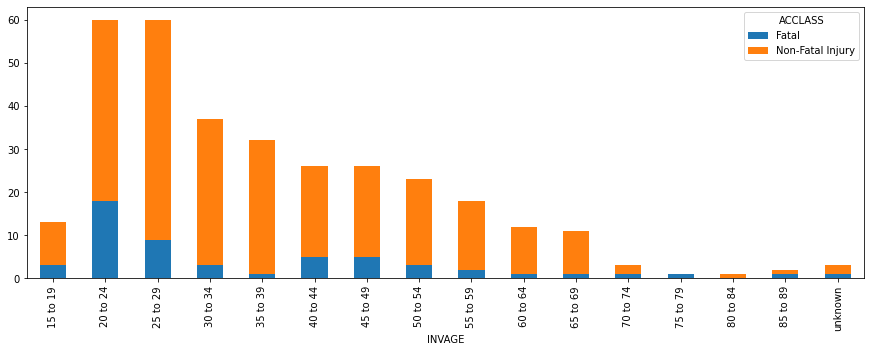

In [89]:
df[df['INVTYPE'] == 'Driver'].groupby(['INVAGE','ACCLASS'])['ACCNUM'].nunique().unstack().plot(kind='bar', stacked=True,figsize=(15, 5))

In [18]:
df[df['INJURY'] == 'Fatal'].groupby(['INVAGE'])['ACCNUM'].count()

INVAGE
15 to 19     5
20 to 24    11
25 to 29     8
30 to 34     1
35 to 39     2
40 to 44     4
45 to 49     2
55 to 59     1
60 to 64     3
80 to 84     2
85 to 89     1
Name: ACCNUM, dtype: int64

Fatality rate is high among young people

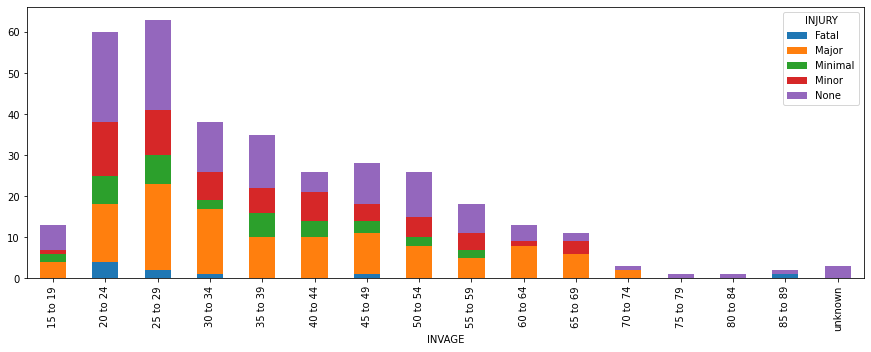

In [91]:
df[df['INVTYPE'] == 'Driver'].groupby(['INVAGE','INJURY'])['ACCNUM'].nunique().unstack().plot(kind='bar', stacked=True,figsize=(15, 5))

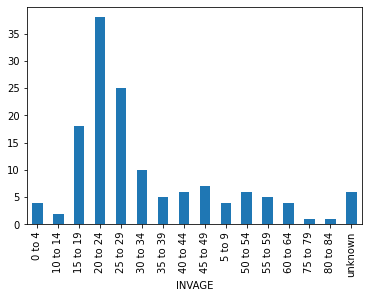

In [18]:
df[df['INVTYPE'] == 'Passenger'].groupby('INVAGE')['ACCNUM'].nunique().plot(kind='bar')

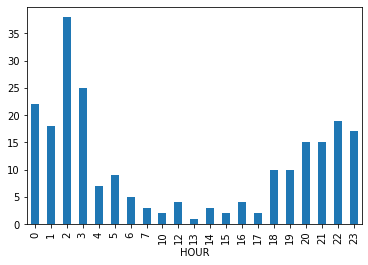

In [12]:
df.groupby('HOUR')['ACCNUM'].nunique().plot(kind='bar')

In [19]:
df['DATE'] = pd.to_datetime(df['DATE'])
df["IsWeekend"] = (df["DATE"].dt.weekday >= 5).astype('int')

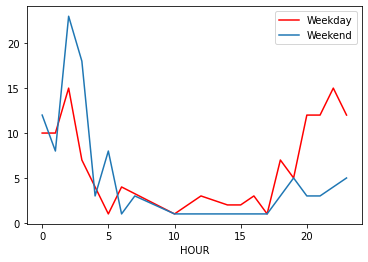

In [37]:
df[df['IsWeekend'] == 0].groupby('HOUR')['ACCNUM'].nunique().plot(kind='line', color = 'red')
df[df['IsWeekend'] == 1].groupby('HOUR')['ACCNUM'].nunique().plot(kind='line')
plt.legend(['Weekday', 'Weekend'])

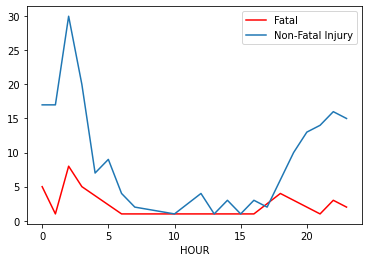

In [39]:
df[df['ACCLASS'] == 'Fatal'].groupby('HOUR')['ACCNUM'].nunique().plot(kind='line', color = 'red')
df[df['ACCLASS'] == 'Non-Fatal Injury'].groupby('HOUR')['ACCNUM'].nunique().plot(kind='line')
plt.legend(['Fatal', 'Non-Fatal Injury'])

In [14]:
df.INVTYPE.unique()

array(['Passenger', 'Driver', 'Motorcycle Driver', 'Vehicle Owner',
       'Cyclist', 'Pedestrian', 'Other', 'Other Property Owner',
       'Witness', 'Truck Driver'], dtype=object)

In [20]:
df.IMPACTYPE.unique()

array(['SMV Other', 'Turning Movement', 'Cyclist Collisions',
       'Pedestrian Collisions', 'Sideswipe', 'Angle', 'Approaching',
       'Rear End', 'SMV Unattended Vehicle'], dtype=object)

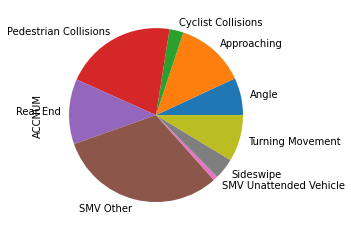

In [23]:
df.groupby('IMPACTYPE')['ACCNUM'].nunique().plot(kind= 'pie')

In [30]:
#Single moving veh collides with other object
df[(df['IMPACTYPE'] == 'SMV Other') & (df['AG_DRIV'] == 'Yes')].ACCNUM.count()

93

In [31]:
df[df['IMPACTYPE'] == 'SMV Other'].ACCNUM.count()

174

In [32]:
df[(df['IMPACTYPE'] == 'SMV Other') & (df['AG_DRIV'] == 'Yes')].ACCNUM.count()/df[df['IMPACTYPE'] == 'SMV Other'].ACCNUM.count()

0.5344827586206896

In [34]:
df[(df['IMPACTYPE'] == 'SMV Other') & (df['SPEEDING'] == 'Yes')].ACCNUM.count()/df[df['IMPACTYPE'] == 'SMV Other'].ACCNUM.count()

0.45977011494252873

In [20]:
df[(df['IMPACTYPE'] == 'SMV Other') & (df['AG_DRIV'] == 'Yes')& (df['SPEEDING'] == 'Yes')].ACCNUM.count()/df[df['IMPACTYPE'] == 'SMV Other'].ACCNUM.count()

0.45977011494252873

More about SMV

In [35]:
df[(df['SPEEDING'] == 'Yes') & (df['AG_DRIV'] == 'Yes')].ACCNUM.count()

313

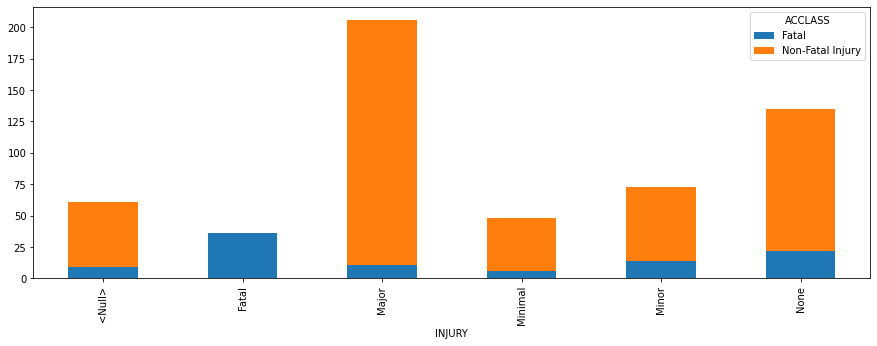

In [21]:
df.groupby(['INJURY','ACCLASS'])['ACCNUM'].nunique().unstack().plot(kind='bar', stacked=True,figsize=(15, 5))

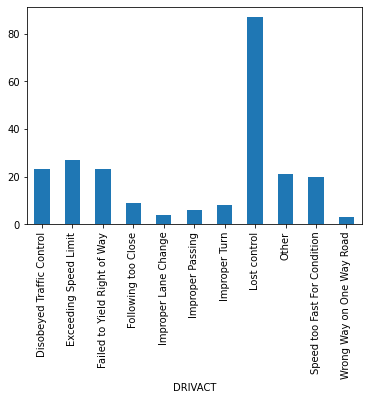

In [22]:
df[(df['DRIVACT'] != '<Null>') & (df['DRIVACT'] != 'Driving Properly')].groupby('DRIVACT')['ACCNUM'].nunique().plot(kind='bar')

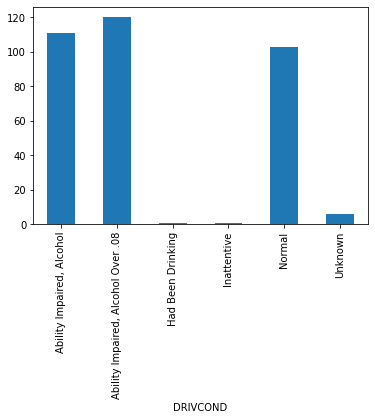

In [6]:
df[df['DRIVCOND'] != '<Null>'].groupby('DRIVCOND')['ACCNUM'].nunique().plot(kind='bar')

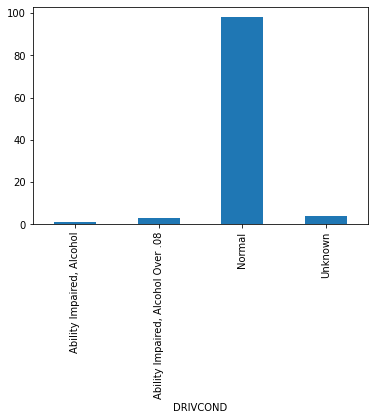

In [79]:
df[df['DRIVACT'] == 'Driving Properly'].groupby('DRIVCOND')['ACCNUM'].nunique().plot(kind='bar')

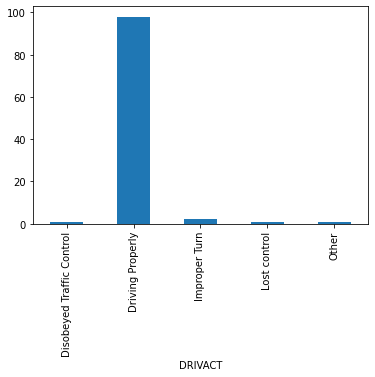

In [78]:
df[(df['DRIVCOND'] == 'Normal')].groupby('DRIVACT')['ACCNUM'].nunique().plot(kind='bar')


In [23]:
df[df['DRIVCOND'] == 'Normal'].groupby('SPEEDING')['ACCNUM'].nunique()

SPEEDING
<Null>    61
Yes       42
Name: ACCNUM, dtype: int64

In [24]:
df[df['DRIVCOND'] == 'Normal'].groupby('AG_DRIV')['ACCNUM'].nunique()

AG_DRIV
<Null>    28
Yes       75
Name: ACCNUM, dtype: int64

In [83]:
df[(df['DRIVACT'] == 'Driving Properly') & (df['AG_DRIV'] == 'Yes')].groupby('SPEEDING')['ACCNUM'].nunique()

SPEEDING
<Null>    36
Yes       38
Name: ACCNUM, dtype: int64

In [43]:
#converting date column to datetime and saving month in new column
df['DATE'] = pd.to_datetime(df['DATE'])
df['Month'] = df['DATE'].dt.month

In [54]:
df.groupby('Month')['ACCNUM'].mean() #How is this average calculated?

Month
1     2.757409e+09
2     2.817895e+09
3     2.316630e+09
4     4.214116e+08
5     2.144084e+09
6     1.844852e+09
7     1.705388e+09
8     9.647846e+08
9     1.957396e+09
10    1.595135e+09
11    1.210887e+09
12    2.474452e+09
Name: ACCNUM, dtype: float64

In [53]:
df.groupby('Month')['ACCNUM'].nunique()

Month
1     11
2     28
3     19
4     19
5     14
6     20
7     21
8     16
9     30
10    17
11    17
12    19
Name: ACCNUM, dtype: int64

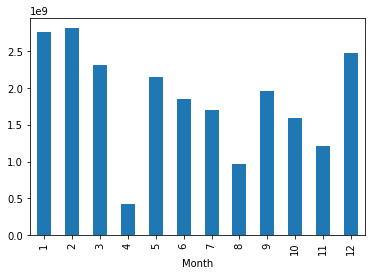

In [46]:
df.groupby('Month')['ACCNUM'].mean().plot(kind='bar')

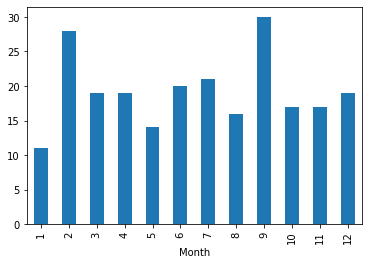

In [47]:
df.groupby('Month')['ACCNUM'].nunique.plot(kind='bar')

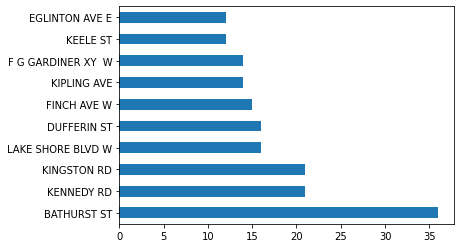

In [55]:
df['STREET1'].value_counts()[:10].plot.barh()

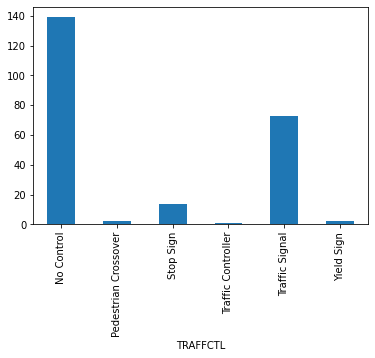

In [85]:
df.groupby('TRAFFCTL')['ACCNUM'].nunique().plot(kind='bar')

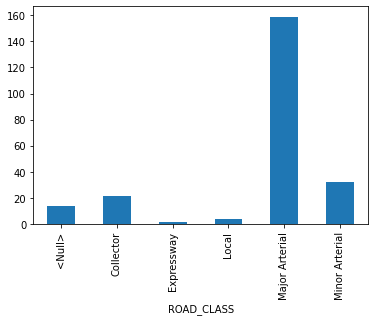

In [87]:
df.groupby('ROAD_CLASS')['ACCNUM'].nunique().plot(kind='bar')